# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')


# Preprocess

In [2]:
data = pd.read_csv('./data/all_retailers.csv', index_col=0)

In [3]:
data.head()

name   abv  year  size(cL)    country  \
0                       Cabalié 2021  13.0  2021      75.0     France   
1  The Black Stump Durif Shiraz 2021  14.5  2021      75.0  Australia   
2         Vinha do Fava Reserva 2020  14.5  2020      75.0   Portugal   
3          w/o Organic Frappato 2021  13.5  2021      75.0      Italy   
4    Cabalié (1 Litre Wine Box) 2021  13.0  2021     100.0     France   

  wine_type  price  num_review  rating  \
0       Red  11.99      7475.0     4.5   
1       Red  11.99      7445.0     4.5   
2       Red  15.49       544.0     4.5   
3       Red  11.99       158.0     3.8   
4       Red   9.99        14.0     4.8   

                                                 url countrycode  \
0  https://www.laithwaites.co.uk/product/Cabali%C...         FRA   
1  https://www.laithwaites.co.uk/product/The-Blac...         AUS   
2  https://www.laithwaites.co.uk/product/Vinha-do...         PRT   
3  https://www.laithwaites.co.uk/product/w/o-Orga...         ITA   
4  https://www.laithwaites.co.uk/product/Cabali%C...         FRA   

   scaled_price  logprice  price_fixed  age  score     retailer  
0       11.9900  1.078819        11.99  1.0    4.5  laithwaites  
1       11.9900  1.078819        11.99  1.0    4.5  laithwaites  
2       15.4900  1.190051        15.49  2.0    4.5  laithwaites  
3       11.9900  1.078819        11.99  1.0    3.8  laithwaites  
4        7.4925  0.874627         9.99  1.0    4.8  laithwaites

# Top N categories

In [4]:
def get_most_reviewed(data, attribute):
    num_review_by_attribute = (
        data
        .groupby(['retailer', attribute], as_index=False)
        ['num_review'].sum()
    )
    most_reviewed = (
        num_review_by_attribute
        .sort_values('num_review', ascending=False)
        .groupby(['retailer'], as_index=False).head(5)
    )
    most_reviewed['total_review'] = most_reviewed.groupby('retailer')['num_review'].transform('sum')
    most_reviewed = most_reviewed.eval('pct_review = num_review / total_review')
    return most_reviewed

In [20]:
def plot_most_reviewed(most_reviewed, attribute, attribute_name):
    fig, axs = plt.subplots(figsize=(14, 8))
    sns.barplot(
        orient='h',
        data=most_reviewed,
        y='retailer',
        x='pct_review',
        hue=attribute,
        palette='colorblind',
        ax=axs,
    )
    axs.set_title(f'5 most reviewed {attribute_name} by retailer')
    for label in axs.containers:
        axs.bar_label(label, labels=[f'{x:,.2%}' for x in label.datavalues])

    axs.legend(bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

In [21]:
data['price_category'] = pd.qcut(data['price'], 10)

In [26]:
params = [
    ('country', 'countries of origin'),
    ('wine_type', 'wine types'),
    ('price_category', 'price categories'),
]

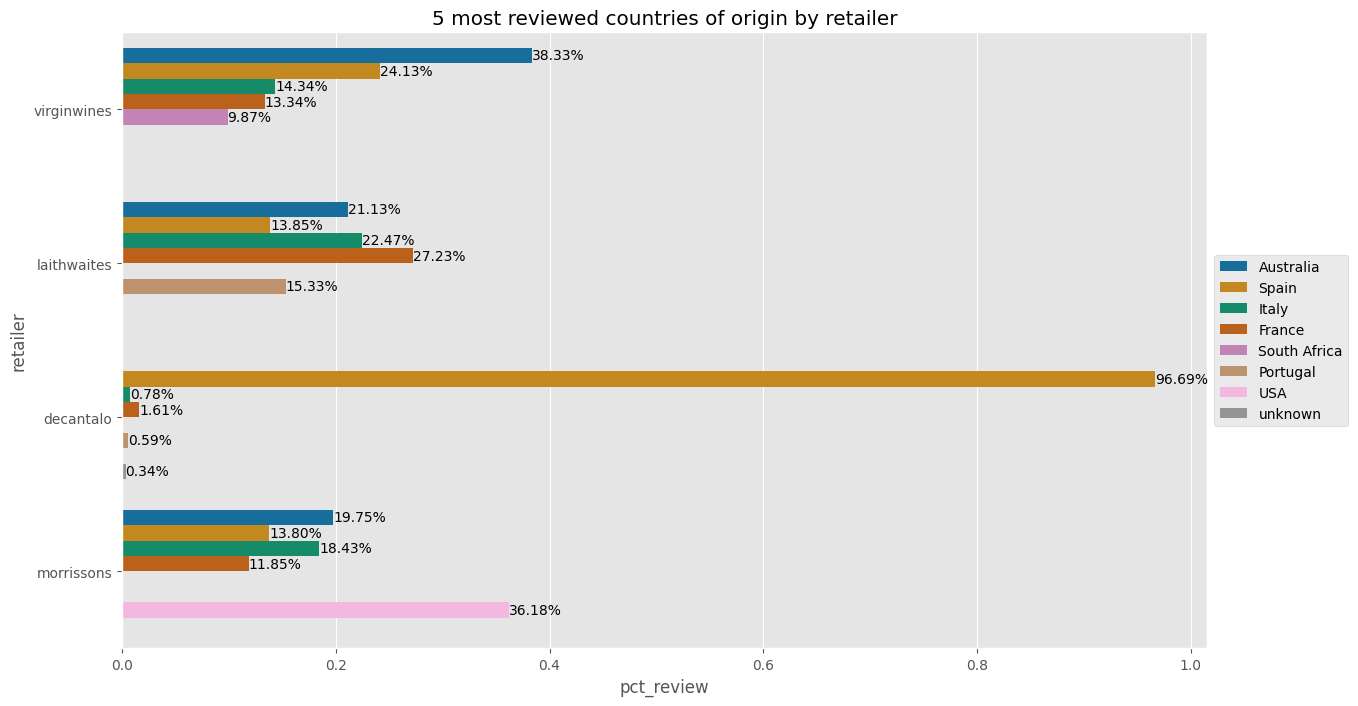

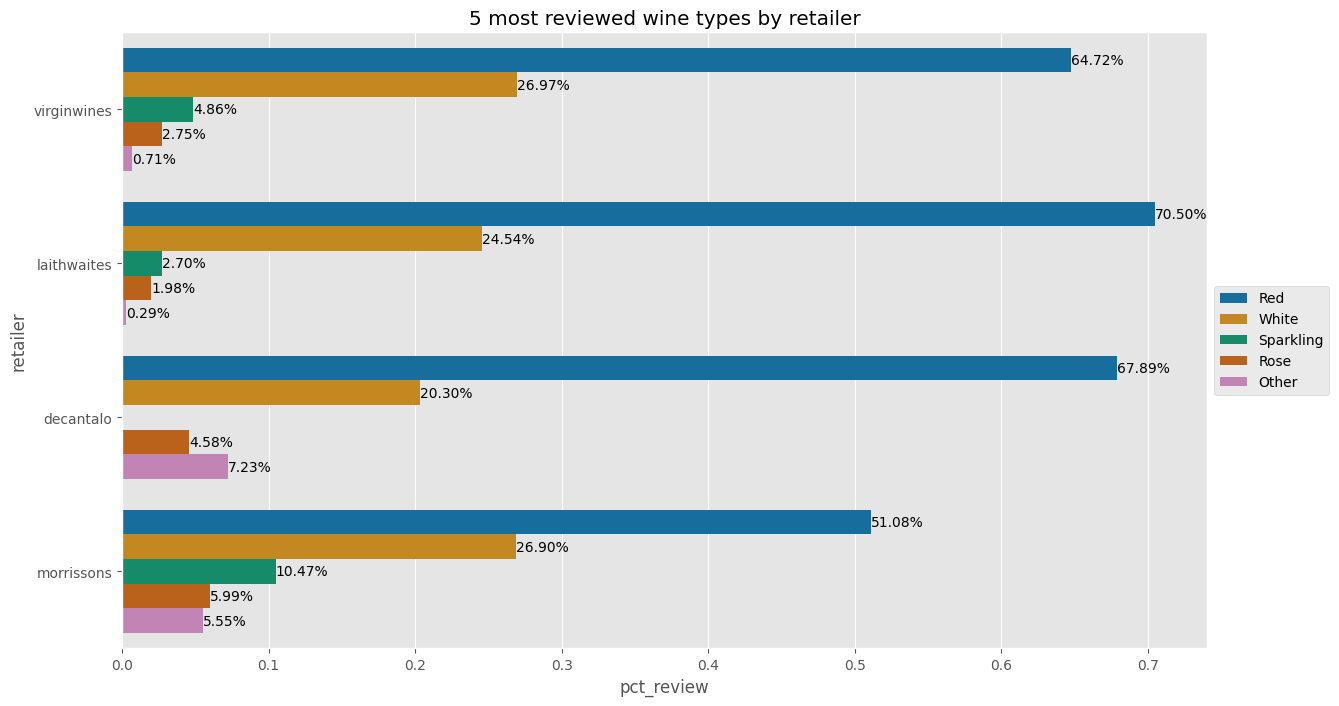

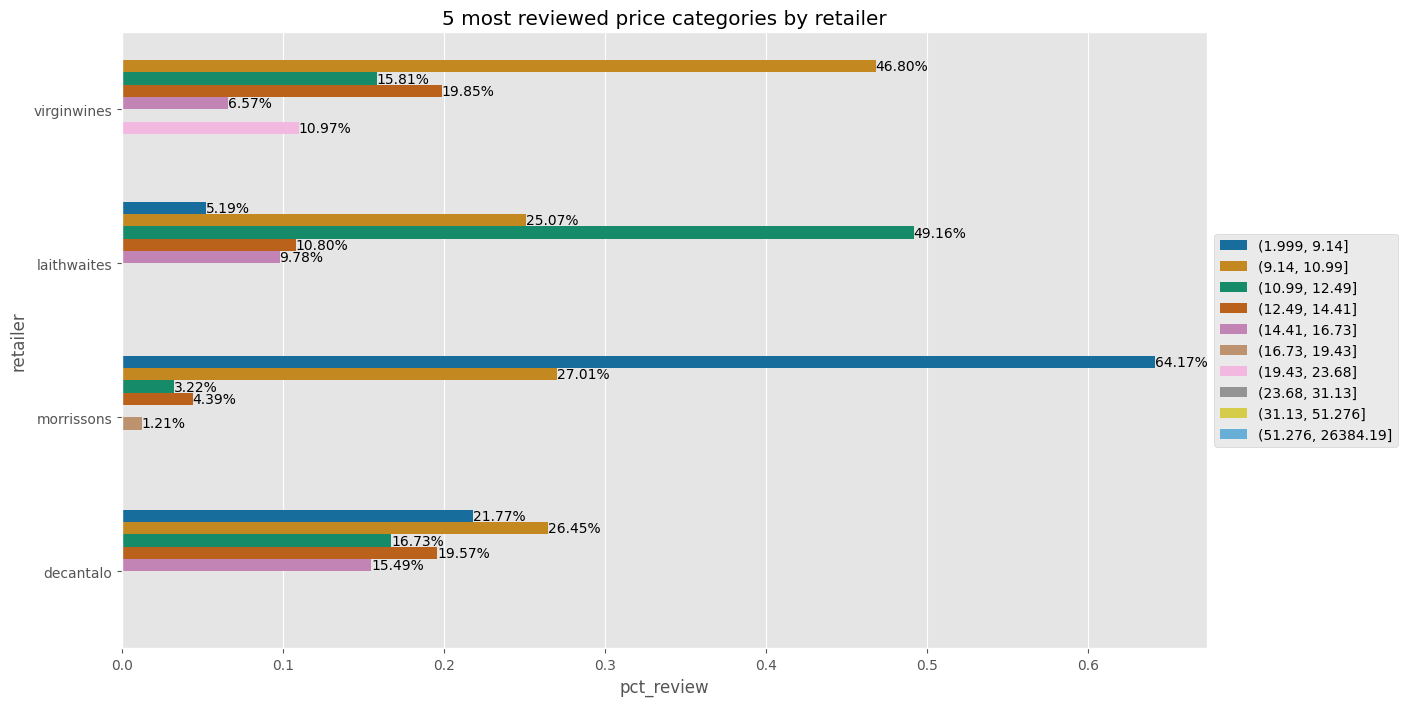

In [27]:
for attribute, attribute_name in params:
    plot_most_reviewed(get_most_reviewed(data, attribute), attribute, attribute_name)

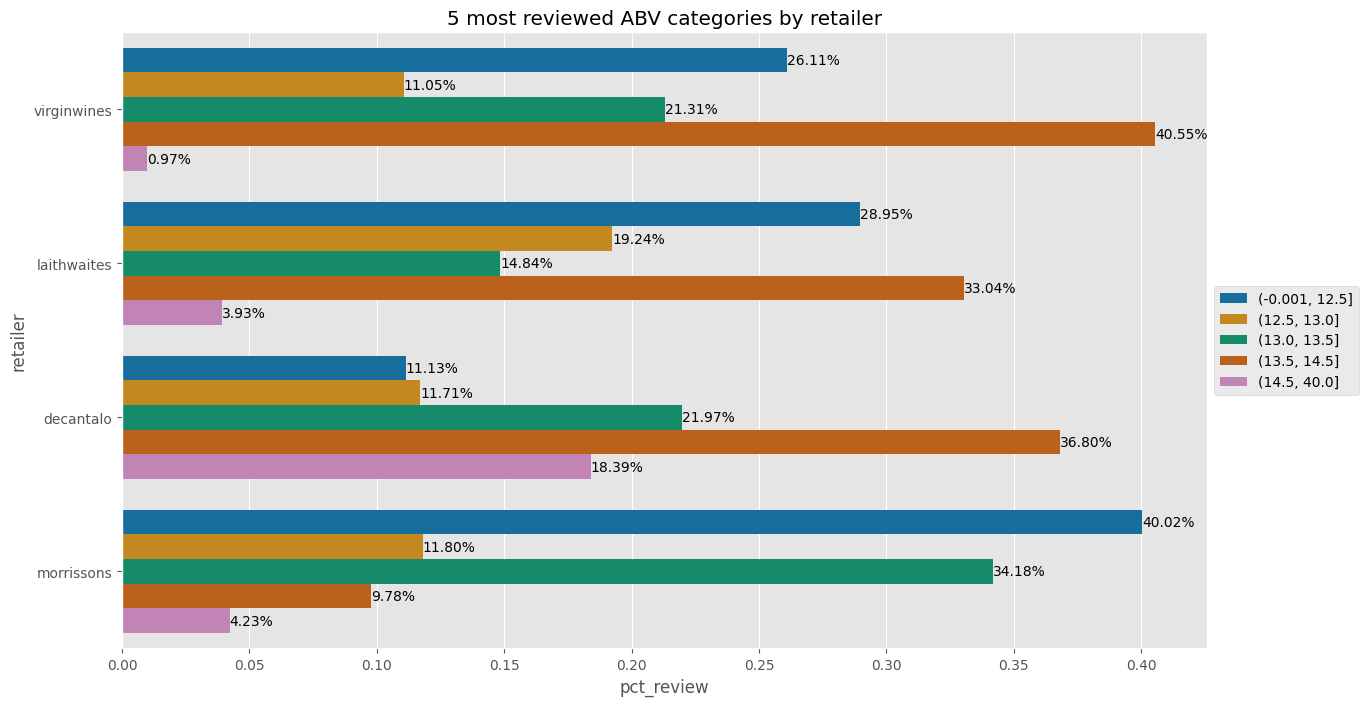

In [30]:
abv_data = data.copy()
abv_data['abv'] = pd.to_numeric(abv_data['abv'], errors='coerce')
abv_data = abv_data.dropna(subset='abv')

abv_data['abv_category'] = pd.qcut(abv_data['abv'], 5)

attribute = 'abv_category'
attribute_name = 'ABV categories'

plot_most_reviewed(get_most_reviewed(abv_data, attribute), attribute, attribute_name)

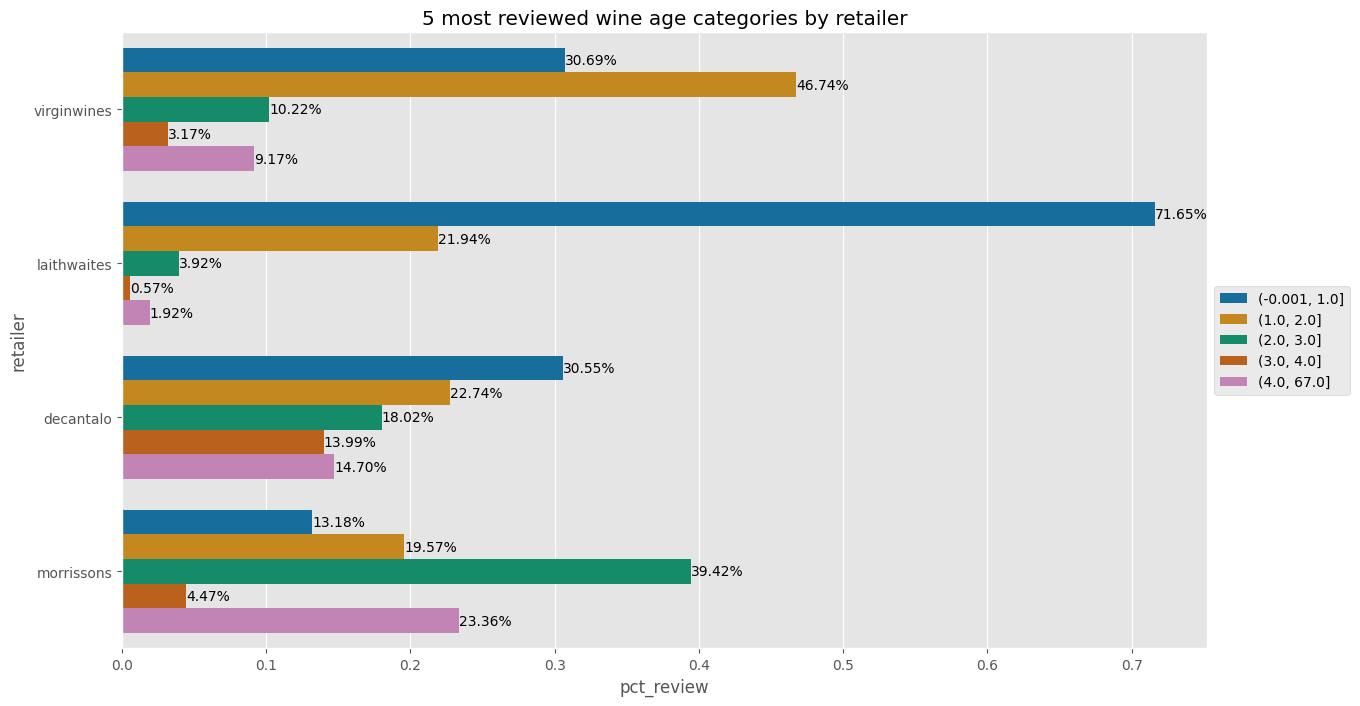

In [29]:
age_data = data.copy()
age_data['age'] = pd.to_numeric(age_data['age'], errors='coerce')
age_data = age_data.dropna(subset='age')

age_data['age_category'] = pd.qcut(age_data['age'], 5)

attribute = 'age_category'
attribute_name = 'wine age categories'

plot_most_reviewed(get_most_reviewed(age_data, attribute), attribute, attribute_name)